In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Read and Explore the Data A Bit

In [2]:
df_data = pd.read_csv("week8_data.csv")

In [3]:
df_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

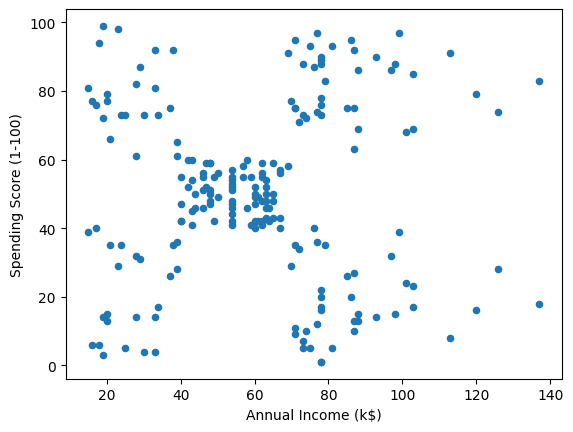

In [4]:
df_data.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)")

**Think: Any intuitive guess? How many clusters do you want to start with?**

## K_Means practice

In [5]:
def plot_cluster_range(data_cluster, cluster_clf):
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data_cluster[:, 0].min() - 1, data_cluster[:, 0].max() + 1
    y_min, y_max = data_cluster[:, 1].min() - 1, data_cluster[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = cluster_clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.imshow(Z, interpolation="nearest",
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired, aspect="auto", origin="lower")

    plt.plot(data_cluster[:, 0], data_cluster[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = cluster_clf.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
                color="w", zorder=10)
    plt.title("K-means Clustering Bond")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

In [6]:
data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].values.copy()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


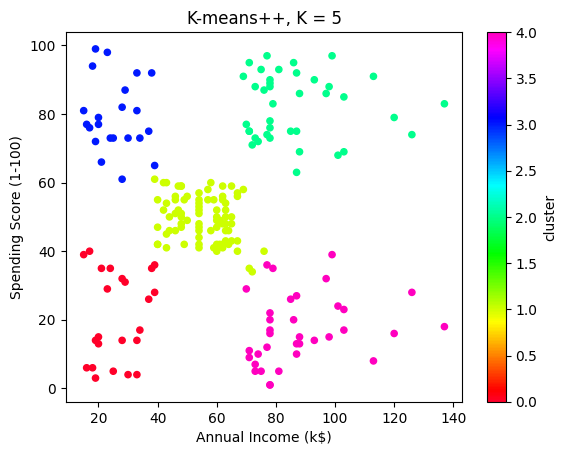

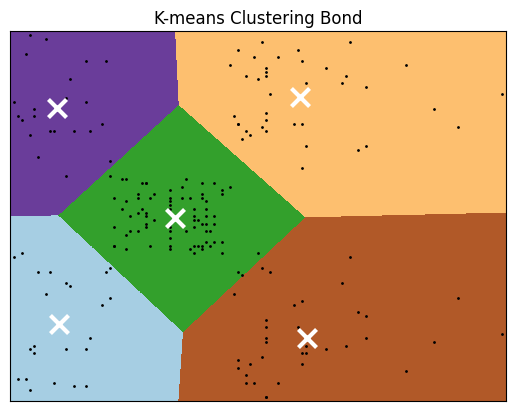

In [7]:
# A quick plot. k = 5. initializing w/ k-means++
num_clusters = 5

np.random.seed(200)
cluster_kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++')

cluster_kmeans = cluster_kmeans.fit(data_cluster)
clusters_pred = cluster_kmeans.predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_kmeans_plus_5, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("K-means++, K = 5")
plt.show()

plot_cluster_range(data_cluster, cluster_kmeans)

## TODO 1: Try with different K. What happens? In KMeans() definition, try with init="random", compare it to init="k-means++". What happens?

NOTE: Feel free to copy the code above and start from there

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


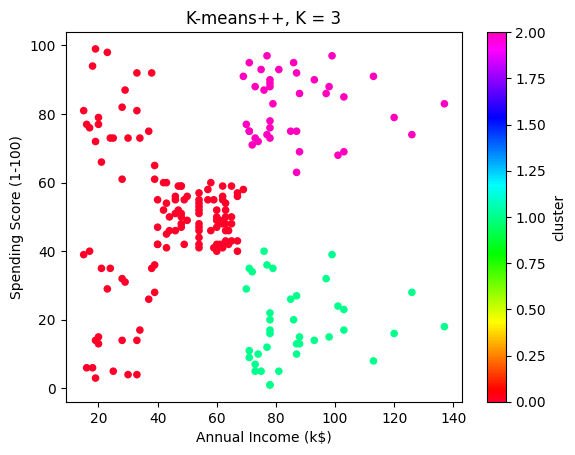

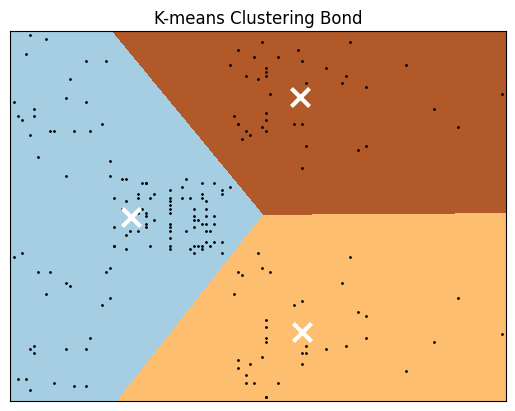

In [11]:
# change k value
num_clusters = 3

np.random.seed(200)
cluster_kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
cluster_kmeans.fit(data_cluster)
clusters_pred = cluster_kmeans.predict(data_cluster)

df_data_cluster = df_data[["Annual Income (k$)", "Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig, ax = plt.subplots()
df_data_cluster.plot.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", c="cluster", cmap="gist_rainbow", ax=ax)
ax.set_title("K-means++, K = 3")
plt.show()
plot_cluster_range(data_cluster, cluster_kmeans)

When the K value is set to 5(above sample), the algorithm identifies five distinct clusters. The data points are grouped based on their similarities in annual income and spending score. The clusters appear well-separated and evenly distributed, suggesting that K=5 might be an appropriate choice for this particular dataset, especially if the goal is to identify five distinct customer segments. On the other hand, with K set to 3, the number of clusters is reduced. As a result, the algorithm has to group the data into fewer, broader clusters. This might lead to a loss of detail, as some nuances captured with five clusters might be lost when only three clusters are used. The choice of K value significantly influences the granularity of the clustering. Lower K values tend to merge distinct clusters, while higher K values can capture more specific groupings.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


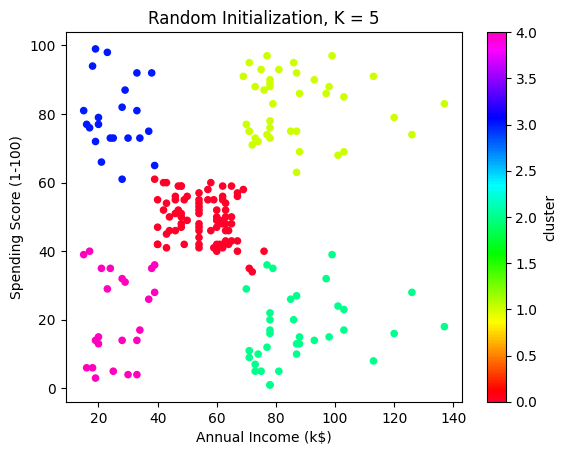

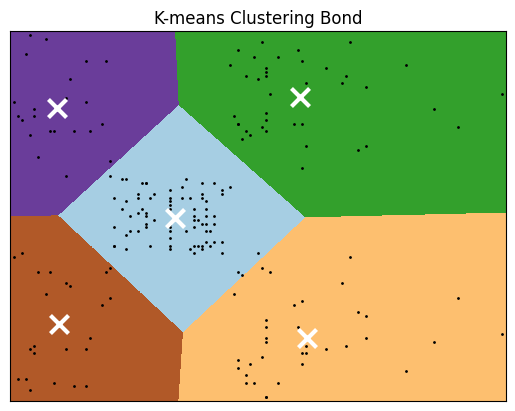

In [12]:
# change to random initialization
num_clusters = 5  # Keeping original K value

np.random.seed(200)
cluster_kmeans = KMeans(n_clusters=num_clusters, init='random')  # Changed initialization to 'random'
cluster_kmeans.fit(data_cluster)
clusters_pred = cluster_kmeans.predict(data_cluster)

df_data_cluster = df_data[["Annual Income (k$)", "Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig, ax = plt.subplots()
df_data_cluster.plot.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", c="cluster", cmap="gist_rainbow", ax=ax)
ax.set_title("Random Initialization, K = 5")
plt.show()
plot_cluster_range(data_cluster, cluster_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


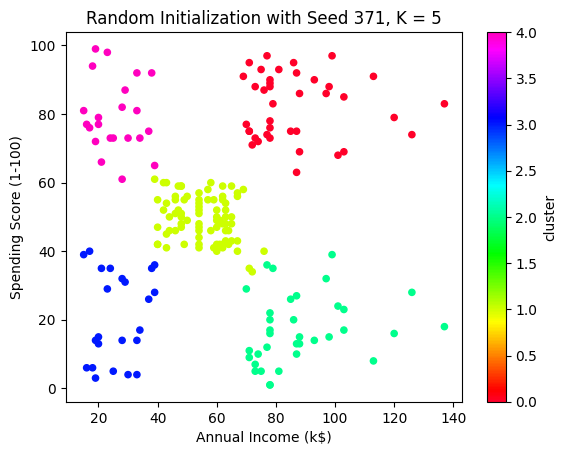

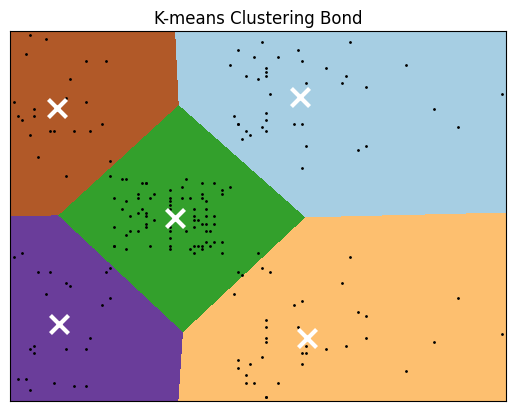

In [13]:
# try random initialization w/ another seed
num_clusters = 5  # Keeping original K value

np.random.seed(371)  # Changed seed
cluster_kmeans = KMeans(n_clusters=num_clusters, init='random')  # Keeping random initialization
cluster_kmeans.fit(data_cluster)
clusters_pred = cluster_kmeans.predict(data_cluster)

df_data_cluster = df_data[["Annual Income (k$)", "Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig, ax = plt.subplots()
df_data_cluster.plot.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", c="cluster", cmap="gist_rainbow", ax=ax)
ax.set_title("Random Initialization with Seed 371, K = 5")
plt.show()
plot_cluster_range(data_cluster, cluster_kmeans)

Using K-means++ initialization with K set at 5 and a random seed of 200, we see that the clusters are uniform and well-separated. This method, K-means++, is designed to improve the initial placement of centroids, reducing the need for many iterations and improving overall clustering quality. The distinct separation of each cluster suggests that K-means++ has effectively found optimal starting points in various areas of the dataset. Switching to random initialization, still with K=5 and the same random seed (200), the clustering results are surprisingly similar to those obtained with K-means++. The boundaries between clusters are still distinct, indicating that even a random start can yield reasonable results, likely due to the inherent distribution of the data. However, changing the random seed to 371, while keeping the same initialization method, leads to a noticeable change in the clustering outcome. The distribution and positioning of some clusters are altered, highlighting how a different random seed can influence the initial centroid placements and, consequently, the final clustering. This change points to the sensitivity of K-means clustering to the initial choice of centroids. In summary, K-means++ tends to offer more consistent and reliable results in clustering. Random initialization, on the other hand, can lead to varied outcomes depending on the chosen random seed and the dataset's characteristics.

# TODO 1.5: Selecting k using elbow method

[Documentation: sklearn.clustering.kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

1. select a reasonable value of k to iterate over `k_range`
2. fit Kmeans with each value of k (use k-means++ for initialization)
3. calculate sum of squared distances of samples to their closest cluster center, add to `sse` list
4. Review elbow plot to select `k`

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'SSE')

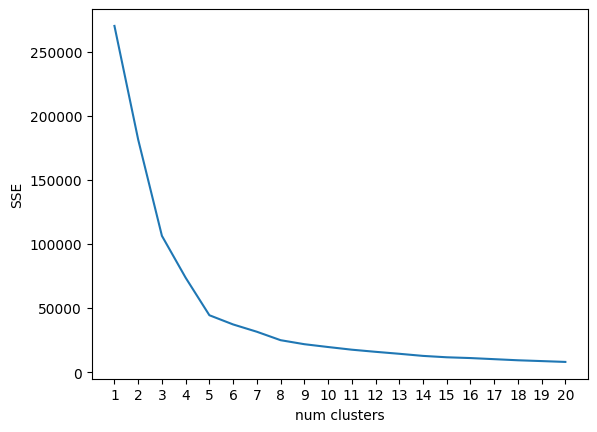

In [26]:
sse = []
k_range = range(1,21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=200)
    kmeans.fit(data_cluster)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse)
plt.xticks(k_range)
plt.xlabel('num clusters')
plt.ylabel('SSE')

## Hierarchical Clustering

In [17]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    from scipy.cluster.hierarchy import dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

### Determine the number of clusters

In [18]:
data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].values.copy()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


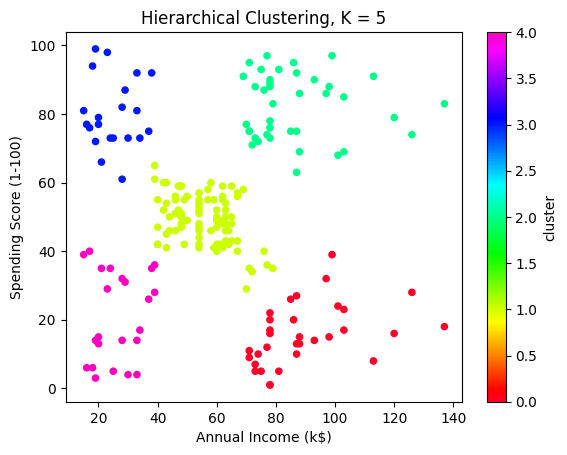

In [19]:
# A quick plot

num_clusters = 5

np.random.seed(200)
cluster_hierarchical = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean')

clusters_pred = cluster_hierarchical.fit_predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_hie_5, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("Hierarchical Clustering, K = 5")
plt.show()

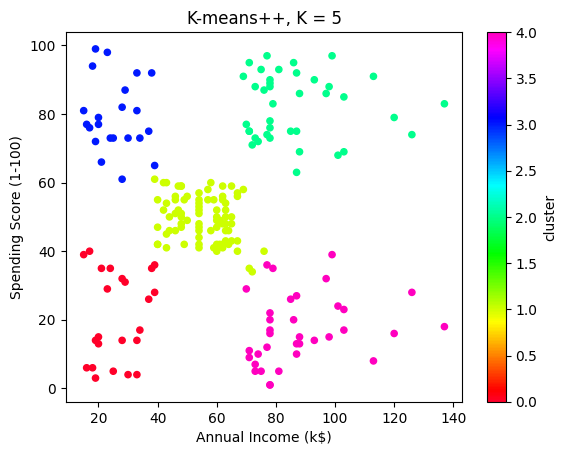

In [20]:
fig_kmeans_plus_5

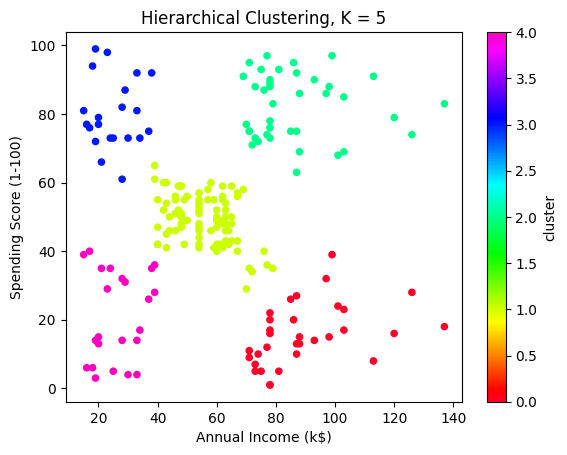

In [21]:
fig_hie_5

## TODO 2: Try with different number of clusters. How does it compare to K-Means?

NOTE: Feel free to copy the code above and start from there

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


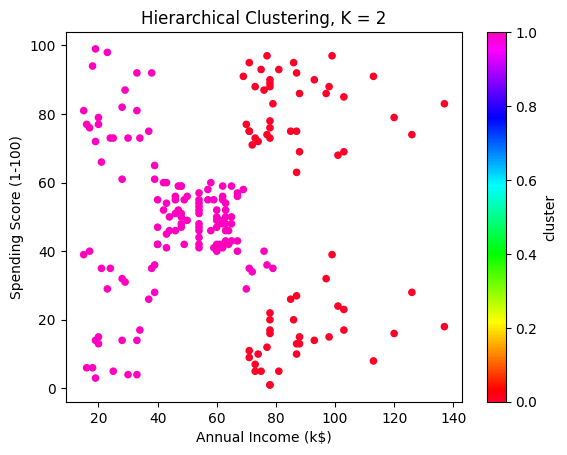

In [22]:
num_clusters = 2 # TODO: change to different num of clusters
np.random.seed(200)

cluster_hierarchical = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean')
clusters_pred = cluster_hierarchical.fit_predict(data_cluster)

df_data_cluster["cluster"] = clusters_pred  # update the cluster assignment

# Plotting
fig_hie_2, ax = plt.subplots()
df_data_cluster.plot.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", c="cluster", cmap="gist_rainbow", ax=ax)
ax.set_title("Hierarchical Clustering, K = 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


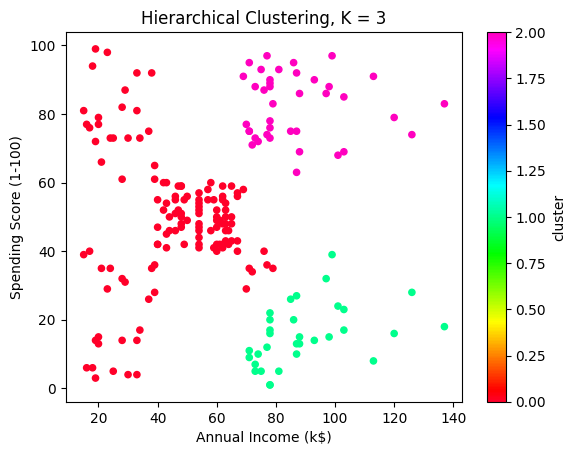

In [23]:
num_clusters = 3
np.random.seed(200)

cluster_hierarchical = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean')
clusters_pred = cluster_hierarchical.fit_predict(data_cluster)

df_data_cluster["cluster"] = clusters_pred  # update the cluster assignment

# Plotting
fig_hie_3, ax = plt.subplots()
df_data_cluster.plot.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", c="cluster", cmap="gist_rainbow", ax=ax)
ax.set_title("Hierarchical Clustering, K = 3")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


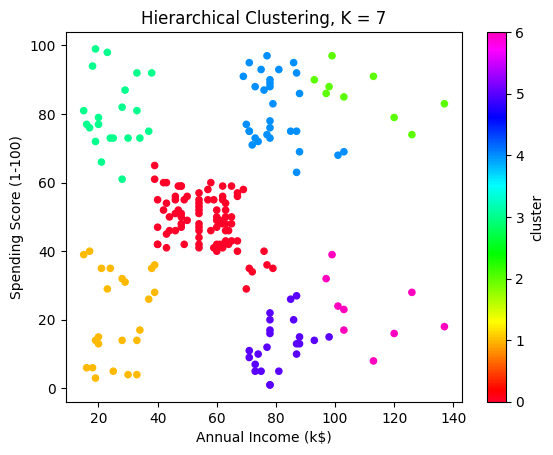

In [24]:
num_clusters = 7
np.random.seed(200)

cluster_hierarchical = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean')
clusters_pred = cluster_hierarchical.fit_predict(data_cluster)

df_data_cluster["cluster"] = clusters_pred  # update the cluster assignment

# Plotting
fig_hie_7, ax = plt.subplots()
df_data_cluster.plot.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", c="cluster", cmap="gist_rainbow", ax=ax)
ax.set_title("Hierarchical Clustering, K = 7")
plt.show()

In Hierarchical Clustering with K=2, the data is divided into two large groups, providing a generalized view of the dataset without much detailed segmentation. With K=3 in Hierarchical Clustering, there's a division into three clusters. This offers a slightly more detailed segmentation compared to K=2, but it still lacks the finer granularity observable in methods like K-means clustering with a higher K value, such as K=5. At K=7 in Hierarchical Clustering, the segmentation becomes more nuanced, revealing intricate structures within the data. This increased number of clusters can be valuable for detailed analyses, such as targeted marketing strategies or in-depth customer insights.

Comparing these to K-means Clustering:
At K=5, K-means Clustering produces distinct and well-separated clusters, providing a detailed view useful for identifying specific customer groups with similar income and spending behaviors. K-means Clustering with K=3, akin to Hierarchical Clustering at the same level, offers a broader overview of data segmentation but with more defined and compact clusters, a result of the optimization inherent in the K-means method.

Overall, hierarchical clustering tends to yield more layered and variably sized clusters compared to K-means, which usually results in more uniform and spherical clusters due to centroid optimization. Hierarchical clustering is also more prone to the influence of outliers and noise, as it builds clusters incrementally and does not reassign points after their initial placement.

### Determine the merge distance threshold

/Users/aylin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


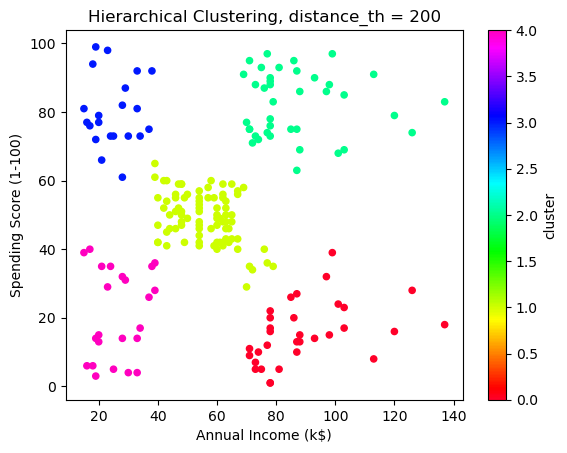

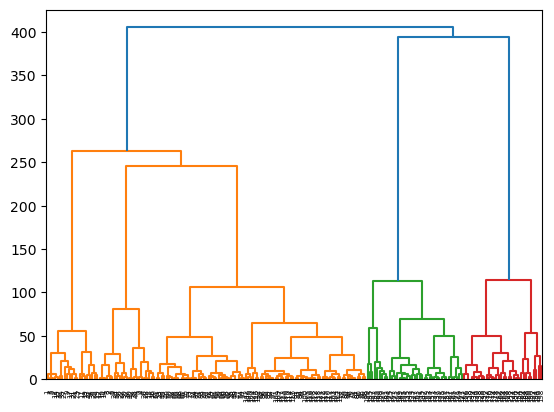

In [ ]:
# A quick plot

distance_threshold = 200

np.random.seed(20)
cluster_hierarchical = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None, affinity='euclidean')

clusters_pred = cluster_hierarchical.fit_predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_hie_dis200, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("Hierarchical Clustering, distance_th = 200")
plt.show()

plot_dendrogram(cluster_hierarchical)

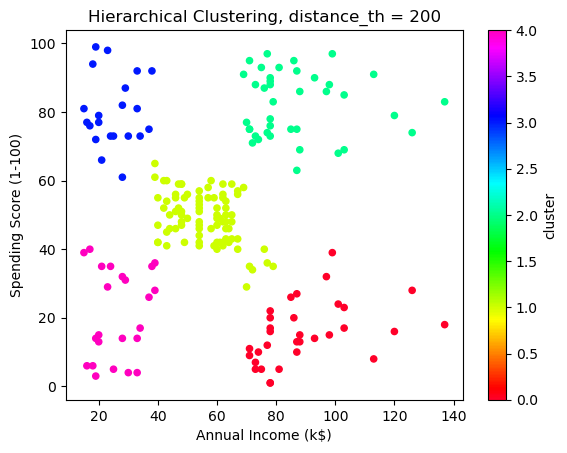

In [ ]:
fig_hie_dis200

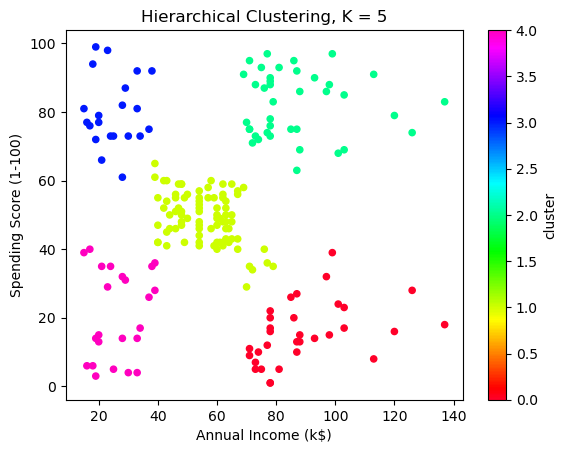

In [ ]:
fig_hie_5

## TODO 3: Try with different distance threshold. Any observations?

NOTE: Feel free to copy the code above and start from there

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


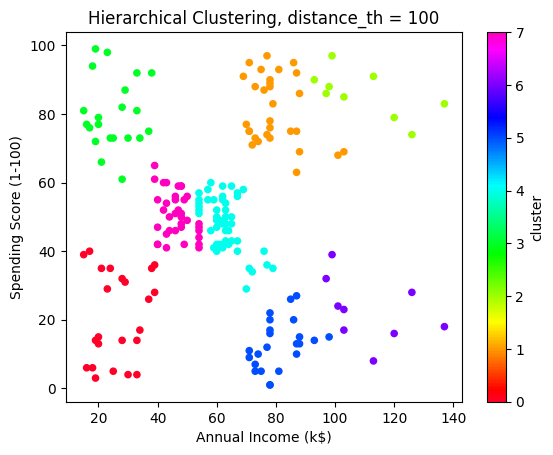

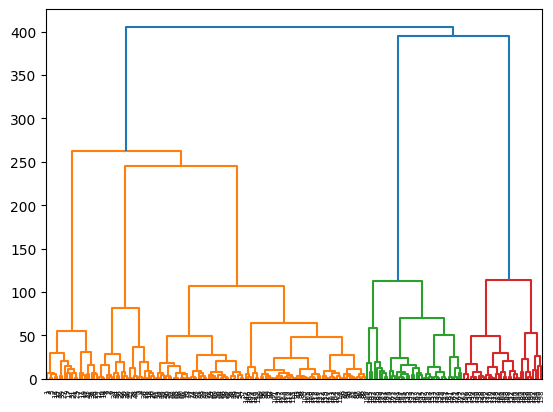

In [29]:
np.random.seed(200)
distance_threshold = 100 # TODO: change to different threshold

cluster_hierarchical = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None, affinity='euclidean')

clusters_pred = cluster_hierarchical.fit_predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_hie_dis100, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("Hierarchical Clustering, distance_th = 100")
plt.show()

plot_dendrogram(cluster_hierarchical)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


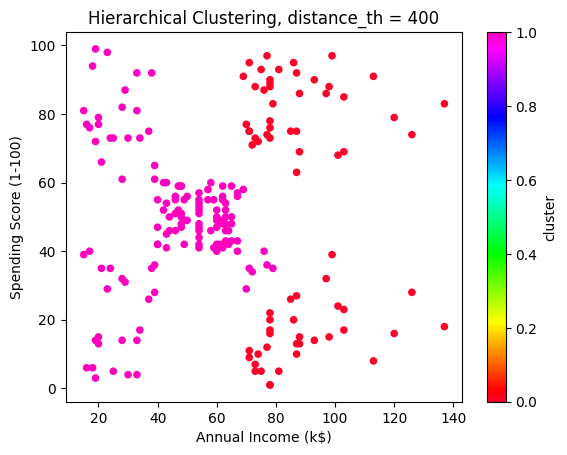

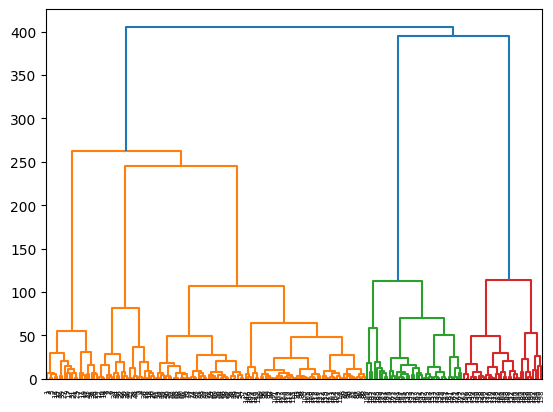

In [30]:
np.random.seed(200)
distance_threshold = 400 # TODO: change to different threshold

cluster_hierarchical = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None, affinity='euclidean')

clusters_pred = cluster_hierarchical.fit_predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_hie_dis400, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("Hierarchical Clustering, distance_th = 400")
plt.show()

plot_dendrogram(cluster_hierarchical)

When the distance threshold is set to 200, the clustering algorithm forms four distinct groups. This threshold brings about a moderate level of detail in segmentation, where data points are clustered together at a certain distance, resulting in a clear but not overly detailed grouping. Reducing the distance threshold to 100, we see a shift towards a more detailed clustering with a larger number of clusters. This finer segmentation suggests that the algorithm now considers only those data points that are relatively close to each other, thereby creating more, smaller groups. Conversely, increasing the distance threshold to 400 simplifies the clustering significantly, merging data points into just two large clusters. At this level, the algorithm abstracts the data more broadly, focusing on the most pronounced differences to form clusters and potentially overlooking subtler relationships within the data. These observations illustrate the sensitivity of clustering to the distance threshold. A lower threshold tends to produce a higher number of clusters, capturing more detailed and subtle relationships in the data. In contrast, a higher threshold leads to fewer clusters, providing a broader overview but potentially missing finer details. This relationship between threshold and detail level is crucial in determining the right balance for specific data analysis needs.